<a href="https://colab.research.google.com/github/ImitatedSky/Github-openCV/blob/main/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install opencv-python
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt # 導入matplotlib.pyplot函式庫

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import os
# 導入Google Drvie套件包
from google.colab import drive
# 將自己的雲端硬碟掛載到Colab虛擬機上
# 參考資料來源:https://colab.research.google.com/drive/1i41Whco5KIb7EuntKYwTVORAkAwCmlkF
drive.mount('/content/gdrive')

!ls gdrive/MyDrive/img # 列出存放測試檔案的目錄清單

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
eye.jpg  Mirumo.jpg


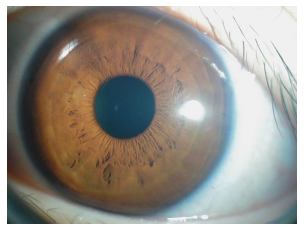

In [26]:
#@title 預設標題文字
img1 = cv.imread('gdrive/MyDrive/img/eye.jpg') #@param ["cv.imread('gdrive/MyDrive/img/eye.jpg')", "cv.imread('gdrive/MyDrive/img/Mirumo.jpg')"] {type:"raw"}
# img1 = cv.imread('gdrive/MyDrive/img/eye.jpg') #讀入掛載之雲端硬碟中的影像檔
img2 = cv.cvtColor(img1, cv.COLOR_BGR2RGB) # 將影像色彩空間從 BGR888 轉成 RGB888
# plt.figure(figsize=(10,10)) # 設定顯示尺寸
plt.axis("off") # 設定關閉XY軸刻尺
plt.imshow(img2) # 繪製單張影像
plt.show() # 顯示影像

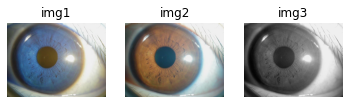

In [27]:
img3 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY) #灰階
# img3 = cv2.imread('gdrive/MyDrive/img/eye.jpg',cv2.IMREAD_GRAYSCALE) #灰階

titles = ['img1', 'img2','img3'] # 設定影像標題
images = [img1, img2, img3] # 設定顯示影像
n = len(images)  #3

#繪製多張影像
for i in range(n): 
  # plt.figure(figsize=(8, 6))
  plt.subplot(1,n,i+1) # 指定子圖繪製位置
  # plt.imshow(images[i]) # 繪製單張影像 不知為何灰階的有綠色
  plt.imshow(images[i], cmap='gray')  #改cmap屬性
  plt.title(titles[i]) # 顯示影像標題
  plt.axis("off") # 設定關閉XY軸刻尺
plt.show() # 顯示影像

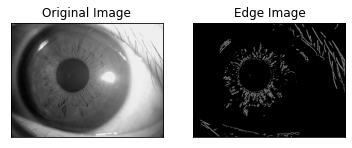

In [28]:
# Canny 降噪 尋找圖像的梯度 非極大值抑制 遲滯閾值
edges = cv.Canny(img3,100,100)
plt.subplot(121),plt.imshow(img3,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

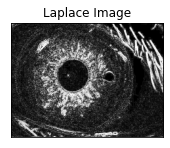

In [29]:
#@title Laplace //Declare the variables we are going to use
ddepth = cv.CV_16S #@param {type:"integer"} #cv.CV_16S
kernel_size = 5 #@param {type:"integer"} #3

# 高斯模糊 不用的話也可以試試
img3_lap = cv.GaussianBlur(img3, (3, 3), 0)

# Apply Laplace function
dst = cv.Laplacian(img3_lap, ddepth, ksize=kernel_size)
# converting back to uint8
abs_dst = cv.convertScaleAbs(dst)
plt.subplot(121),plt.imshow(abs_dst,cmap = 'gray')
plt.title('Laplace Image'), plt.xticks([]), plt.yticks([])
plt.show()

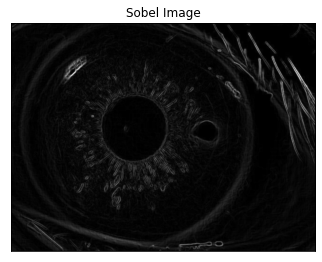

In [30]:
#@title Sobel

ksize = 3 #@param {type:"integer"}
scale = 1 #@param {type:"integer"}
delta  = 0 #@param {type:"integer"}
ddepth = cv.CV_16S #@param {type:"integer"} #cv.CV_16S


# 高斯模糊
img3_sobel = cv.GaussianBlur(img3, (3, 3), 0)

x = cv.Sobel(img3_sobel, cv.CV_16S, 1, 0)
y = cv.Sobel(img3_sobel, cv.CV_16S, 0, 1)
absX = cv.convertScaleAbs(x)
absY = cv.convertScaleAbs(y)

# 融合兩張圖
dst = cv.addWeighted( absX ,0.5 ,absY ,0.5,0)

plt.figure(figsize=(12, 5))
plt.subplot(121),plt.imshow(dst,cmap = 'gray')
plt.title('Sobel Image'), plt.xticks([]), plt.yticks([])

plt.show()

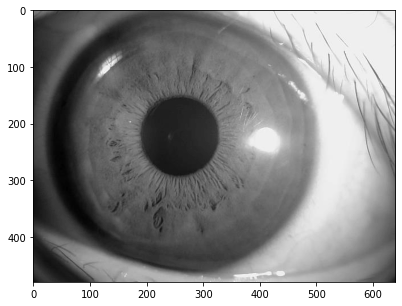

In [31]:
img_means = cv.imread('gdrive/MyDrive/img/eye.jpg') #@param ["cv.imread('gdrive/MyDrive/img/eye.jpg')", "cv.imread('gdrive/MyDrive/img/Mirumo.jpg')"] {type:"raw"}
img_means = cv.cvtColor(img_means,cv.COLOR_BGR2GRAY) #灰階

plt.figure(figsize=(12, 5))
plt.subplot(111),plt.imshow(img_means,cmap = 'gray')
plt.show()  

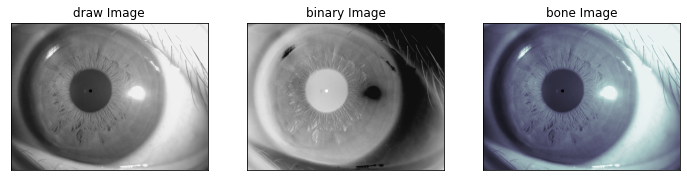

In [32]:
img99 = cv.imread('gdrive/MyDrive/img/eye.jpg') #@param ["cv.imread('gdrive/MyDrive/img/eye.jpg')", "cv.imread('gdrive/MyDrive/img/Mirumo.jpg')"] {type:"raw"}
img_draw = cv.cvtColor(img99,cv.COLOR_BGR2GRAY) #灰階
img_draw = cv.circle(img_draw,(258,223), 5, (0,0,255), -1) #畫個圈

plt.figure(figsize=(12, 5))
plt.subplot(131),plt.imshow(img_draw,cmap = 'gray')
plt.title('draw Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_draw,cmap = 'binary')
plt.title('binary Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_draw,cmap = 'bone')
plt.title('bone Image'), plt.xticks([]), plt.yticks([])
plt.show()

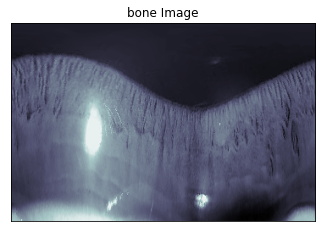

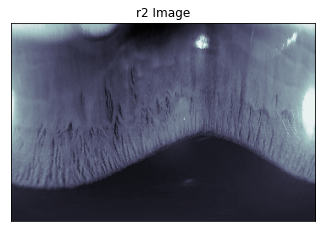

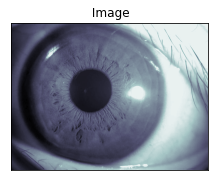

-0.1856938407175163
----
<class 'float'>
----


False

In [50]:
import math
img_0 = cv.imread('gdrive/MyDrive/img/eye.jpg') #@param ["cv.imread('gdrive/MyDrive/img/eye.jpg')", "cv.imread('gdrive/MyDrive/img/Mirumo.jpg')"] {type:"raw"}

img_0 = cv.cvtColor(img_0,cv.COLOR_BGR2GRAY) #灰階

r1 = np.zeros((235, 360))
r2 = np.zeros((235, 360))

pi = math.pi


# for i in range(235):
#   for j in range(360):
#     rx[i,j,0] = img_0[i,j,0]
# print(rx)
for r in range(235):
  for theta in range(360):
    # rx[r,theta] = img_0[r,theta]
    # if type(r*math.cos(theta*3)) == 'int':
    r1[r,theta] = img_0[int(r*math.cos(2*pi*theta/360))-235,
                    int(r*math.sin(2*pi*theta/360))-360]
                    
plt.figure(figsize=(12, 5))
plt.subplot(121),plt.imshow(r1,cmap = 'bone')
plt.title('bone Image'), plt.xticks([]), plt.yticks([])

for r in range(235):
  for theta in range(360):
    # rx[r,theta] = img_0[r,theta]
    # if type(r*math.cos(theta*3)) == 'int':
    r2[234-r,theta] = img_0[int(r*math.sin(2*pi*theta/360))-235,
                    int(r*math.cos(2*pi*theta/360))-360]
                    
plt.figure(figsize=(12, 5))
plt.subplot(122),plt.imshow(r2,cmap = 'bone')
plt.title('r2 Image'), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(12, 5))
plt.subplot(133),plt.imshow(img_0,cmap = 'bone')
plt.title(' Image'), plt.xticks([]), plt.yticks([])

plt.show()

aa = 90 #@param {type:"slider", min:0, max:360, step:1}

print(math.cos(aa/(2*pi)))
print('----')
print(type(math.cos(aa)))
print('----')
isinstance(math.cos(aa),int)
